In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR


In [24]:
!ls

Auto-ARIMA.ipynb                     VAR.ipynb
ETTh1.csv                            check_dataset_features.ipynb
ETTh2.csv                            etth1-forecastingneuralprophet.ipynb
GenericForecaster.ipynb              lightning_logs
LTSF_Linear


## Data prepration 
If we have k time series and we want to auto regress using last p values then 

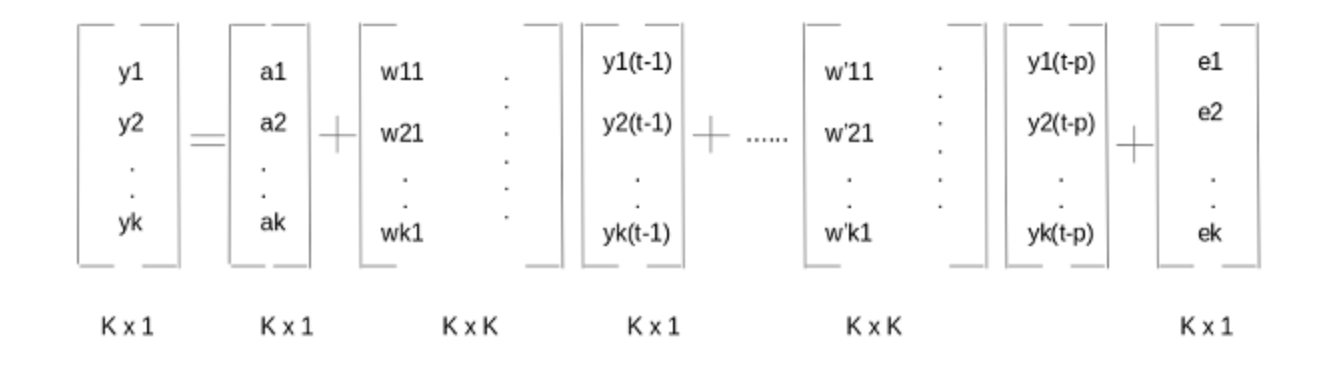


In [25]:
mdata = sm.datasets.macrodata.load_pandas().data
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly = dates_from_str(quarterly)
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pd.DatetimeIndex(quarterly)


NameError: name 'dates_from_str' is not defined

In [26]:
mdata


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [27]:
train=mdata[(mdata.index<"2007-12-26")]
test=mdata[(mdata.index>="2007-12-26")]

TypeError: Invalid comparison between dtype=int64 and str

## Switching dataset 

In [28]:
mdata1 = pd.read_csv('ETTh1.csv')
mdata2 = pd.read_csv('ETTh2.csv')

#mdata = pd.DataFrame()
#mdata = pd.concat([mdata1,mdata2])

In [29]:
mdata1.drop(columns=["HUFL","HULL","MUFL","LUFL", "MULL","LULL"],inplace=True)
mdata2.drop(columns=["HUFL","HULL","MUFL","LUFL", "MULL","LULL"],inplace=True)

In [30]:
mdata=pd.merge(mdata1,mdata2,on='date')

In [31]:
mdata

,date,OT_x,OT_y
0,2016-07-01 00:00:00,30.531000,38.661999
1,2016-07-01 01:00:00,27.787001,37.124001
2,2016-07-01 02:00:00,27.787001,36.465000
3,2016-07-01 03:00:00,25.044001,33.608501
4,2016-07-01 04:00:00,21.948000,31.850500
...,...,...,...
17415,2018-06-26 15:00:00,10.904000,47.084999
17416,2018-06-26 16:00:00,11.044000,48.183498
17417,2018-06-26 17:00:00,10.271000,48.183498
17418,2018-06-26 18:00:00,9.778000,46.865501


In [32]:
mdata.set_index('date', inplace = True)
mdata=mdata.diff().dropna()
mdata=mdata.diff().dropna()
#mdata=mdata.diff().dropna()

mdat/a

NameError: name 'mdat' is not defined

In [33]:
train=mdata[(mdata.index<"2017-12-26 17:00:00")]
test=mdata[(mdata.index>="2017-12-26 17:00:00")]

In [34]:
train.shape, test.shape, mdata.shape

((13047, 2), (4371, 2), (17418, 2))

In [35]:
#data = (mdata).diff().dropna()
#data

In [36]:
model = VAR(train)

/Users/raman/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [37]:
results = model.fit(168)

In [38]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 16, Mar, 2023
Time:                     13:34:24
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.175933
Nobs:                     12879.0    HQIC:                 -0.435951
Log likelihood:          -32226.9    FPE:                   0.567514
AIC:                    -0.566515    Det(Omega_mle):        0.538940
--------------------------------------------------------------------
Results for equation OT_x
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.000708         0.008000           -0.089           0.929
L1.OT_x          -1.117821         0.009014         -124.006           0.000
L1.OT_y           0.091533         0.010022            9.133           0.000


In [39]:
arr_ = results.forecast(train.values[-168:],4371)

In [40]:
df_forecast= pd.DataFrame(arr_)
df_forecast

,0,1
0,0.054231,-1.093505
1,-0.456247,-0.288393
2,0.002163,0.011720
3,0.217692,0.257965
4,-0.287828,0.339717
...,...,...
4366,-0.002798,-0.010678
4367,-0.002924,-0.010311
4368,-0.002684,-0.008569
4369,-0.002115,-0.005821


In [41]:
test

,OT_x,OT_y
date,,
2017-12-26 17:00:00,0.422000,-1.098999
2017-12-26 18:00:00,-0.563000,-0.219500
2017-12-26 19:00:00,0.071000,-0.220001
2017-12-26 20:00:00,-0.493000,1.099500
2017-12-26 21:00:00,-0.281001,0.219001
...,...,...
2018-06-26 15:00:00,-0.070000,-0.219498
2018-06-26 16:00:00,-0.564001,1.098499
2018-06-26 17:00:00,-0.912999,-1.098499


In [20]:
def MSE(g_truth, measured):
    n=len(g_truth)
    diff=g_truth-measured
    return np.sum(np.square(diff)) / n 
    

In [21]:
MSE(df_forecast[0].to_numpy() ,test["OT_x"].to_numpy()) , MSE(df_forecast[1].to_numpy() ,test["OT_y"].to_numpy())

(0.8298342386285907, 0.5931356355054012)

In [22]:
df_forecast[0]

0       0.054231
1      -0.456247
2       0.002163
3       0.217692
4      -0.287828
          ...   
4366   -0.002798
4367   -0.002924
4368   -0.002684
4369   -0.002115
4370   -0.001318
Name: 0, Length: 4371, dtype: float64

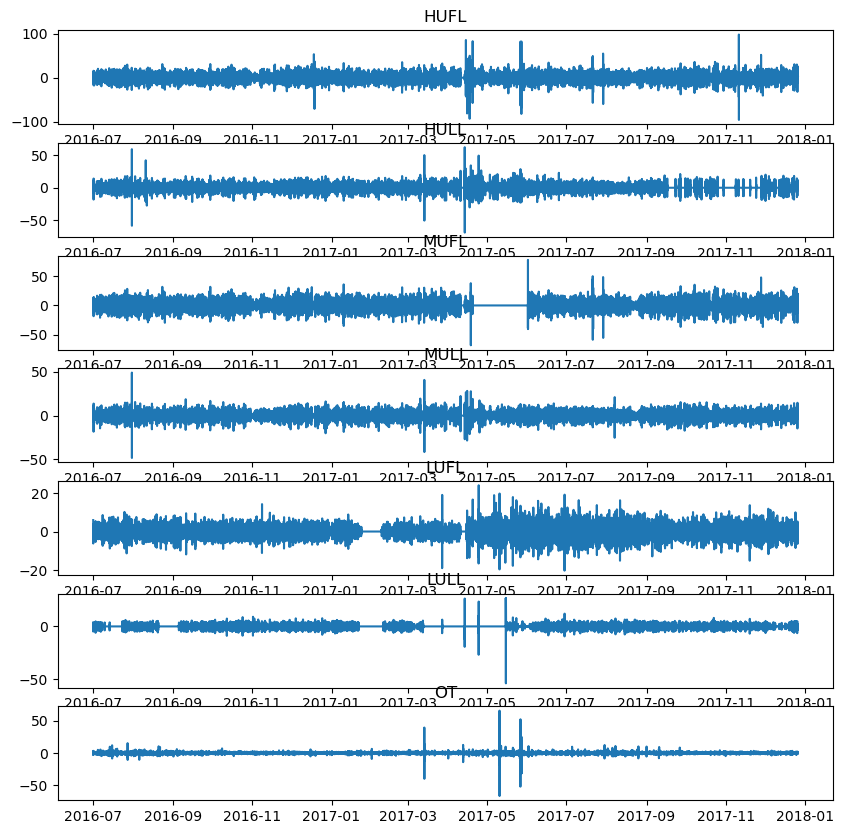

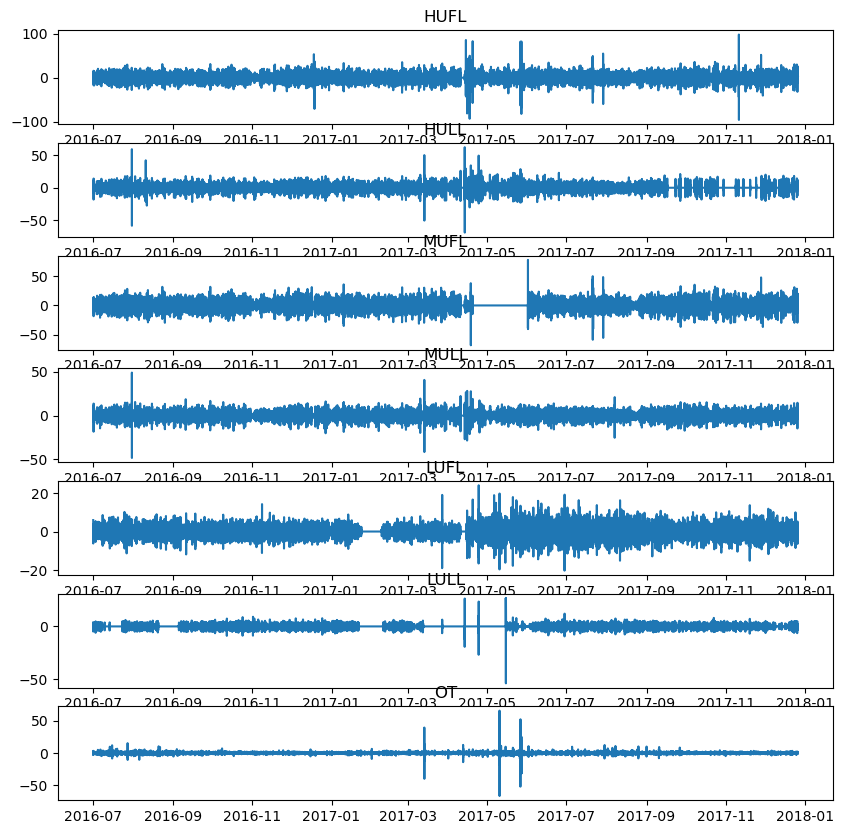

In [18]:
results.plot()

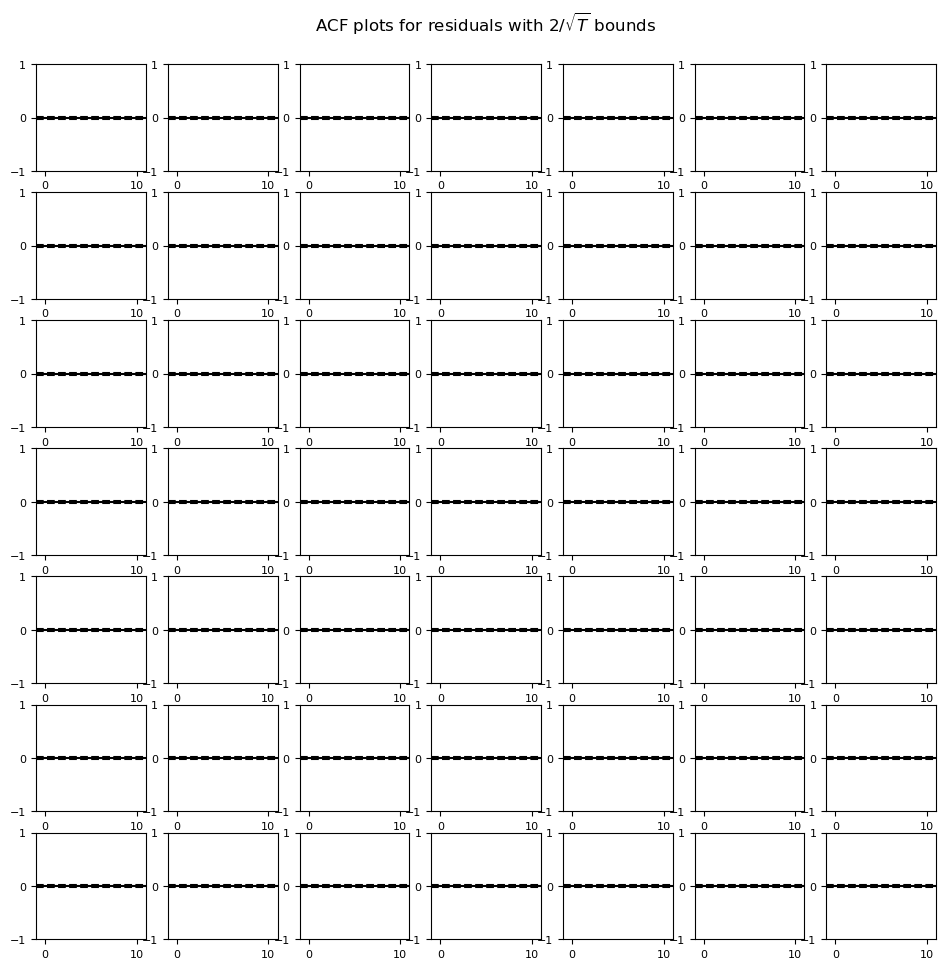

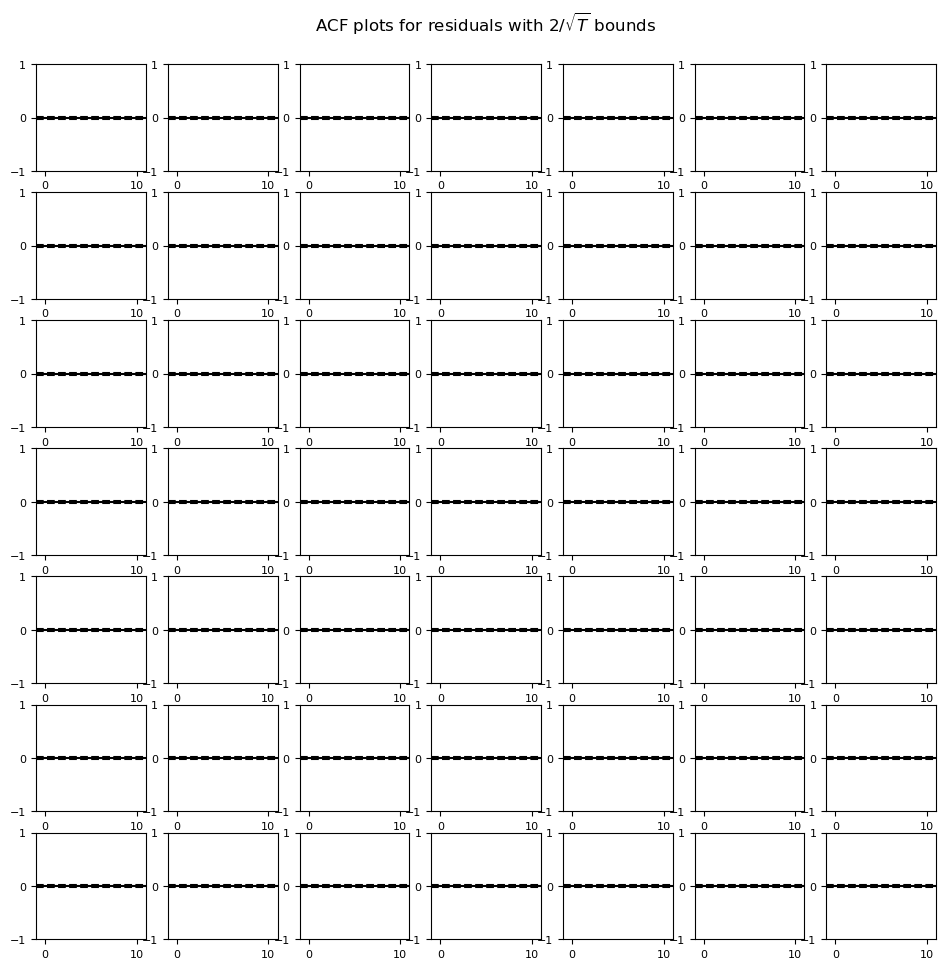

In [19]:
results.plot_acorr()

In [20]:
model.select_order(15)

In [89]:
results = model.fit(maxlags=15, ic='aic')

In [90]:
lag_order = results.k_ar

In [91]:
lag_order

15

In [95]:
results.forecast(data.values[-lag_order:], 50000)

array([[ 1.38044241e+00,  1.31311398e+00,  1.02263042e+00, ...,
         9.99061170e-01,  1.01118127e-01, -7.74385963e-01],
       [-1.02160664e+00, -3.81822203e-01, -1.09488859e+00, ...,
         1.92769111e-01,  1.10519049e-01, -9.18533697e-01],
       [-6.12412787e-01, -1.10335935e-01, -8.03063075e-01, ...,
         2.06927561e-01,  1.20991941e-01, -1.05389249e+00],
       ...,
       [-1.24926243e-04, -9.98872855e-05,  6.20265406e-04, ...,
        -7.09540143e-04, -8.60254633e-05,  7.63810783e-04],
       [-1.24926243e-04, -9.98872855e-05,  6.20265406e-04, ...,
        -7.09540143e-04, -8.60254633e-05,  7.63810783e-04],
       [-1.24926243e-04, -9.98872855e-05,  6.20265406e-04, ...,
        -7.09540143e-04, -8.60254633e-05,  7.63810783e-04]])

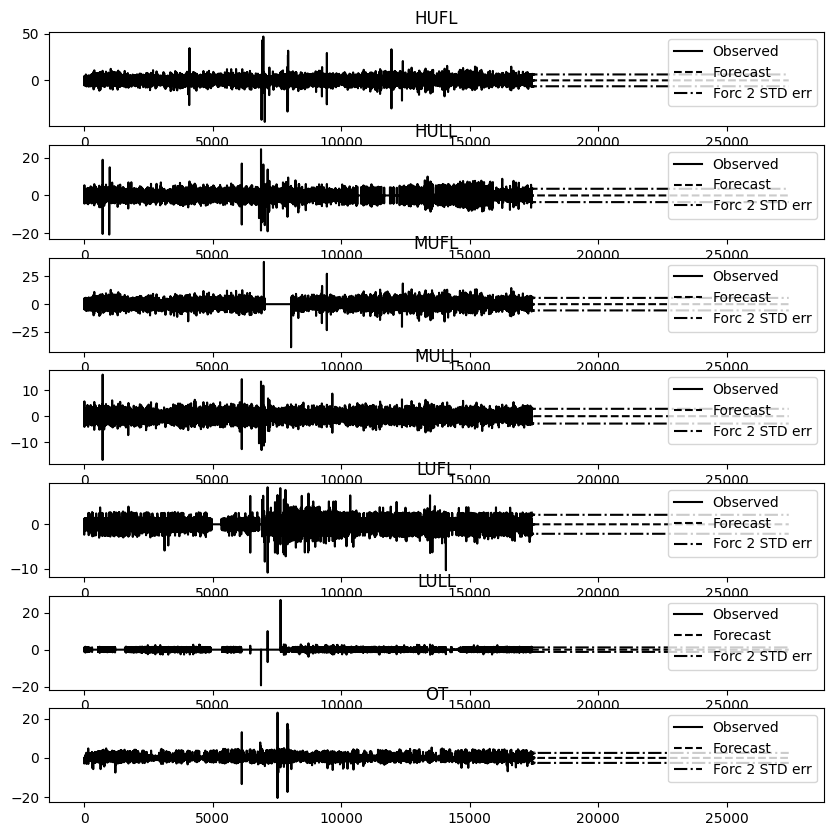

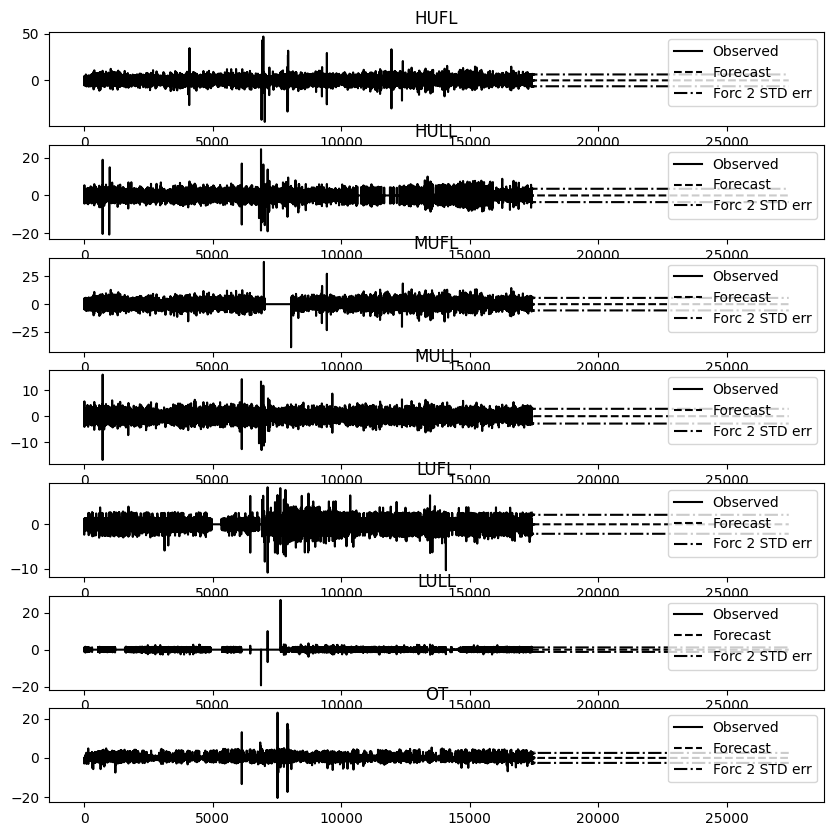

In [98]:
results.plot_forecast(10000)